In [3]:
# Installing keras segmentation models
!pip install keras-segmentation

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.3/753.3 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 81.3 MB/s eta 0:00:00
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29056 sha256=fee39865eaca1efe4b6aa01cf13a952c551edf7c971763fb1d8af330e4f10aac
  Stored in directory: /root/.cache/pip/wheels/2a/87/5b/ddc104c262fe1280e0565a2cc1b9b6b04963af12e462cdf068
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.34.0
    Uninstalling imageio-2.34.0:
      Successfully uninstalled imageio-2.34.0


In [1]:
# Connecting to google drive to access the required dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



**1. Research and Model Selection**

**VGG UNet Architecture:**

The VGG UNet model gives upon the highly effective U-Net architecture, renowned for its semantic segmentation capabilities. By the VGG16 model utilization as its foundation, it inherits a powerful feature extraction mechanism crucial for accurate segmentation.

**Performance and Track Record:**

Built upon the proven U-Net architecture, the VGG UNet model has consistently demonstrated strong performance across various image segmentation benchmarks.
Its balance between model complexity and performance renders it versatile, making it suitable for a diverse range of segmentation tasks.

**Compatibility with Dataset:**

The choice of the VGG UNet model is influenced by its seamless integration with the dataset's characteristics. By considering the dataset's complexity, including multiple images and potentially complex segmentation requirements, the VGG UNet model's depth and robust feature extraction capabilities offers advantages.

**Implementation Ease:**

Implementing the VGG UNet model is straightforward, easy and ready to its inclusion in the keras-segmentation library. Its integration with Keras simplifies both the training and deployment processes, eliminating the need for extensive custom coding.

**Practical Considerations:**

Practical factors, such as available computational resources, and ease of experimentation, also contributed to selecting the VGG UNet model.
With a modest training specification of just 5 to 8 epochs in the provided code snippet.

References - https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html

In [4]:
# Importing required python libraries
from keras_segmentation.models.unet import vgg_unet
import time
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

**2. Data Collection and preparation**

I have collected the dataset from kaggle (https://www.kaggle.com/datasets/bulentsiyah/semantic-drone-dataset) and uploaded in my google drive to access from google colab easily. The dataset is Drone dataset which has images and masks folder in it. The Drone Dataset is designed to help drones navigate safely through urban environments by understanding the scene semantics. The images in the dataset show over 20 houses captured from a top-down perspective, taken from heights ranging between 5 to 30 meters above the ground. These images are captured using a high-resolution camera, resulting in images sized at 6000x4000 pixels (24 megapixels). The dataset comprises 400 images in the training set, which are publicly available. To prepare the dataset, the dimensions was resized to 416 and 608 (input_height and input_width) as it is required for this VGG Unet model architecture. Also, set the variable num_of_classes to 23. This step ensures that our model is set up properly and ready to learn from our dataset.

In [7]:
# Paths to directories containing images and masks
train_images_dir = "/content/drive/MyDrive/semantic_drone_dataset/original_images/"
train_masks_dir = "/content/drive/MyDrive/semantic_drone_dataset/label_images_semantic/"

**3. Implementation**

As I mentioned before, vgg_unet from keras segmenatation model is very easy to implement. I set the train images and masks directory path to train_images and train_annotations accordingly to train the model. Also, mentioned the checkpoints_path as vgg_unet. I have used 8 epochs to train the model. Moreover, I defined a function called predict_image() that is set up to help predict on test images and show the results visually. This function needs the paths to both the test images and their corresponding ground truth labels. Using the trained model, it predicts the segmentation of the test images and then displays three images side by side: the original image, the predicted segmentation, and the ground truth label. Finally, the code demonstrates this prediction process on two test images, each with its own ground truth label, allowing us to see how well the model performs. Overall, this code implementation is simple and precise to sets up the entire process of training the image segmentation model, checking its predictions, and evaluating how accurately it segments images it hasn't seen before.
References - https://www.kaggle.com/code/bulentsiyah/deep-learning-based-semantic-segmentation-keras#3.-I-extracted-Github-codes

In [8]:
num_of_classes = 23
epochs = 8
model = vgg_unet(n_classes=num_of_classes ,  input_height=416, input_width=608  )

model.train(
    train_images =  train_images_dir,
    train_annotations = train_masks_dir,
    checkpoints_path = "vgg_unet" , epochs=epochs
)

Verifying training dataset


100%|██████████| 400/400 [05:43<00:00,  1.17it/s]
/usr/local/lib/python3.10/dist-packages/keras_segmentation/train.py:156: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_gen, steps_per_epoch,


Dataset verified! 
Epoch 1/8
512/512 [==============================] - 1312s 3s/step - loss: 3.4363 - accuracy: 0.0942
Epoch 2/8
512/512 [==============================] - 1325s 3s/step - loss: 3.1022 - accuracy: 0.2358
Epoch 3/8
512/512 [==============================] - 1333s 3s/step - loss: 2.8593 - accuracy: 0.3123
Epoch 4/8
512/512 [==============================] - 1330s 3s/step - loss: 2.6980 - accuracy: 0.3661
Epoch 5/8
512/512 [==============================] - 1327s 3s/step - loss: 2.5701 - accuracy: 0.4070
Epoch 6/8
512/512 [==============================] - 1333s 3s/step - loss: 2.4737 - accuracy: 0.4335
Epoch 7/8
512/512 [==============================] - 1326s 3s/step - loss: 2.4000 - accuracy: 0.4501
Epoch 8/8
512/512 [==============================] - 1331s 3s/step - loss: 2.3284 - accuracy: 0.4667


In [12]:
def predict_image(test_image_path, val_image_path):
  start = time.time()

  test_image = test_image_path
  out = model.predict_segmentation(
      inp=test_image,
      out_fname="out.png"
  )

  fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

  img_orig = Image.open(test_image)
  axs[0].imshow(img_orig)
  axs[0].set_title('test image.jpg')
  axs[0].grid(False)

  axs[1].imshow(out)
  axs[1].set_title('predicted image.png')
  axs[1].grid(False)

  validation_image = val_image_path
  axs[2].imshow( Image.open(validation_image))
  axs[2].set_title('true ground label image.png')
  axs[2].grid(False)

  done = time.time()
  elapsed = done - start

1/1 [==============================] - 0s 161ms/step


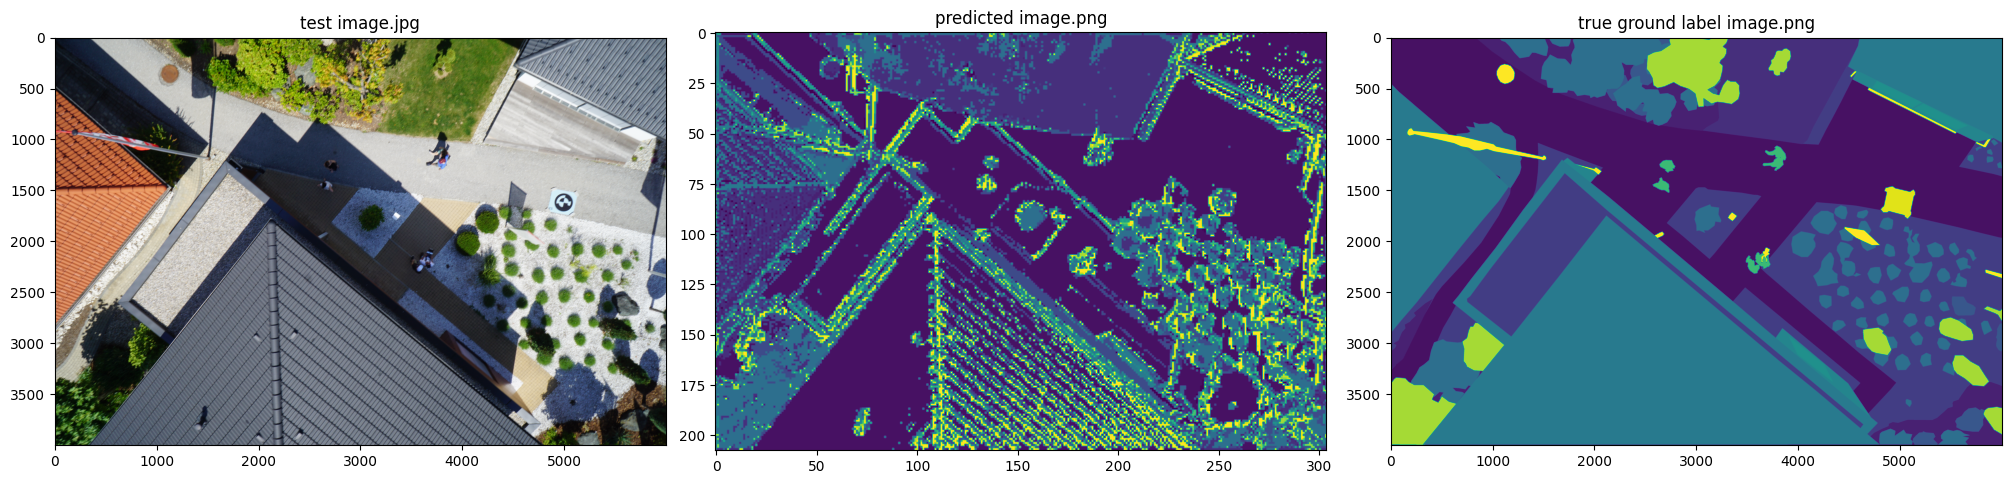

In [13]:
test_image_path_5 = "/content/drive/MyDrive/semantic_drone_dataset/original_images/005.jpg"
val_image_path_5 = "/content/drive/MyDrive/semantic_drone_dataset/label_images_semantic/005.png"
predict_image(test_image_path_5,val_image_path_5)

1/1 [==============================] - 0s 156ms/step


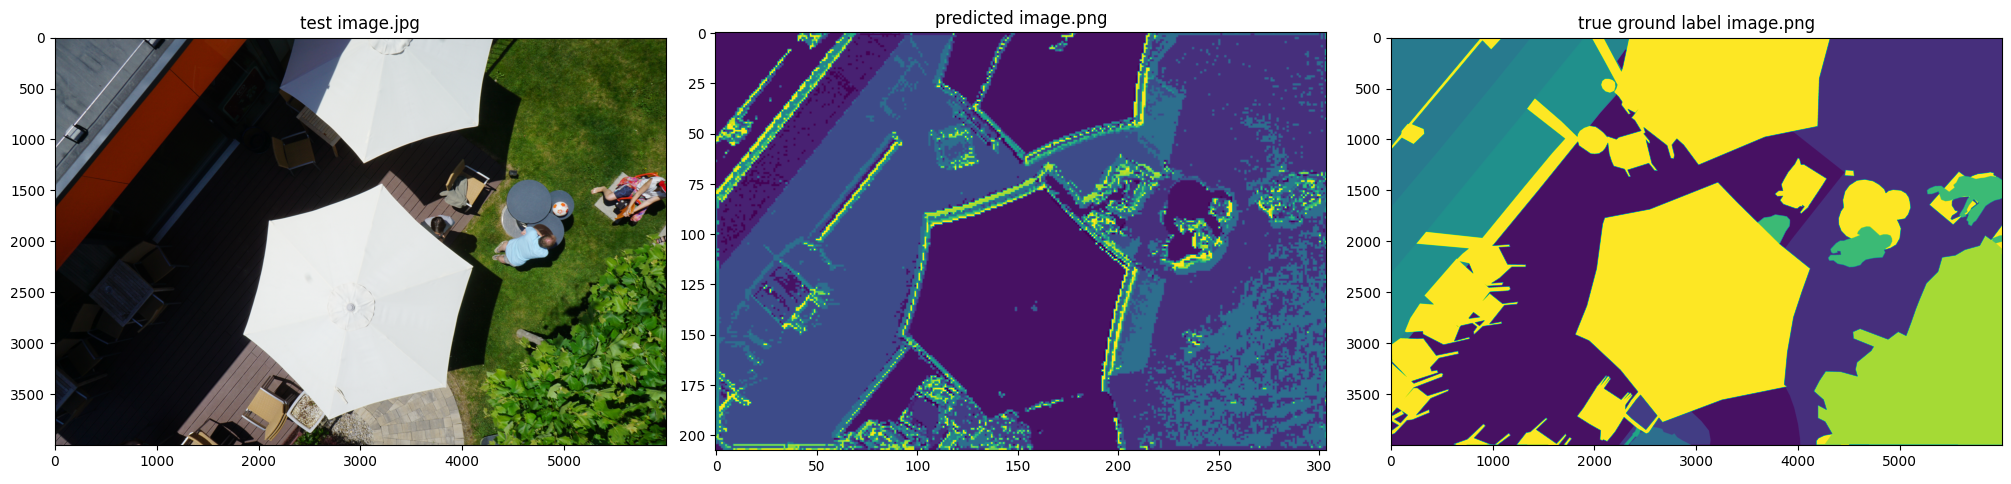

In [14]:
test_image_path_588 = "/content/drive/MyDrive/semantic_drone_dataset/original_images/588.jpg"
val_image_path_588 = "/content/drive/MyDrive/semantic_drone_dataset/label_images_semantic/588.png"
predict_image(test_image_path_588,val_image_path_588)

**4. Analysis and Discussion**

Based on the code above, random test images were passed through the predict_image function to visualize the segmented images produced by the model's predictions. The model achieved an overall accuracy of 46%, indicating moderate performance, though it successfully segmented the images accurately. Resizing the images to dimensions of 416-608 pixels contributed to increased processing time but resulted in improved segmentation outcomes. However, due to the time-consuming nature of training the model, it wasn't feasible to demonstrate training with differently resized images, such as 256-256 pixels.

The visualized outputs presents the test image, the predicted (segmented) image and the ground label image. While the predicted image appears to be well-segmented, it doesn't precisely match the ground-level image in terms of accuracy or precision. This result is because of the low accuracy.


In the future, exploring the use of various models can significantly boost the effectiveness of training data and segmentation tasks. By employing a mix of different models, each with its own unique design, strengths, and abilities, we can gain valuable insights into different aspects of the data, thereby improving segmentation accuracy overall. Embracing a multi-model approach by constructing a robust CNN architecture allows us to tap into a broader range of features and viewpoints, ultimately leading to more comprehensive and precise segmentation results.